# Exploración de DataFrames

Este notebook muestra ejemplos de cómo usar un DataFrame de pandas para explorar, analizar y manipular datos. Usaremos el dataset data, disponible en la librería Seaborn.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Cargar información

In [2]:
# Cargar el dataset
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
data['time'] = data.time.astype(str)

## Información General del dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    object  
 6   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 8.9+ KB


In [6]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

llamar a las columnas existen 2 maneras

In [7]:
data.time

,time
0,Dinner
1,Dinner
2,Dinner
3,Dinner
4,Dinner
...,...
239,Dinner
240,Dinner
241,Dinner
242,Dinner


In [8]:
data['time']

,time
0,Dinner
1,Dinner
2,Dinner
3,Dinner
4,Dinner
...,...
239,Dinner
240,Dinner
241,Dinner
242,Dinner


## Estadisticas descriptivas

In [9]:
estadisticos = data.describe() # Solo describe a los que son float o int
estadisticos

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Tipos de datos y valores unicos por columna

###Funcion unique

In [10]:
times = data.time.unique()
times

array(['Dinner', 'Lunch'], dtype=object)

como es un array esos valores unicos, se puede hacer lo siguiente

In [11]:
data.time.unique()[0]

'Dinner'

In [12]:
data.time.unique()[1]

'Lunch'

## Seleccion de columnas

In [13]:
data.total_bill

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [14]:
data['total_bill']

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


Forma de llamar a varias columnas a la vez

In [15]:
data[['total_bill', 'tip', 'sex']]

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
...,...,...,...
239,29.03,5.92,Male
240,27.18,2.00,Female
241,22.67,2.00,Male
242,17.82,1.75,Male


## filtrado de filas

In [16]:
data[data.time == 'Dinner']

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Forma de filtrar uniendo condicionales establecidas en una lista anteriormente

In [17]:
comidas = ['Dinner', 'Lunch']

In [18]:
data[data.time.isin(comidas)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
data[data['tip'] > 5]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
116,29.93,5.07,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5


### Ejemplo 1

In [20]:
# malograr la data a proposito
data.iloc[0,5] = "Diner" # iloc nos dice en la columna 5, primera fila
data.iloc[1,5] = "Diner"
data.iloc[4,5] = "Dinerr"

Lo que debemos hacer es limpiar la columna time, pero para ello primero veremos los datos que contiene la columna time

In [21]:
data.time.unique()

array(['Diner', 'Dinner', 'Dinerr', 'Lunch'], dtype=object)

Medir cuantos datos estan incorrectos

In [22]:
data.time.value_counts()

,count
time,
Dinner,173
Lunch,68
Diner,2
Dinerr,1


### Filtrar por el metodo query

In [23]:
data.query(" time == 'Diner' ")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Diner,2
1,10.34,1.66,Male,No,Sun,Diner,3


In [24]:
data.query(" time == 'Dinerr' ")

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinerr,4


In [25]:
data.query(" time == 'Dinerr' or time == 'Diner' ")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Diner,2
1,10.34,1.66,Male,No,Sun,Diner,3
4,24.59,3.61,Female,No,Sun,Dinerr,4


### filtrarlo mediante creacion de listas

In [26]:
anomalias = ['Diner', 'Dinerr']

In [27]:
data.query('time in @anomalias')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Diner,2
1,10.34,1.66,Male,No,Sun,Diner,3
4,24.59,3.61,Female,No,Sun,Dinerr,4


### Corrigiendolo

In [28]:
data.time == 'Diner'

,time
0,True
1,True
2,False
3,False
4,False
...,...
239,False
240,False
241,False
242,False


In [29]:
np.where(data.time == 'Diner' , 'Dinerr', data.time)

array(['Dinerr', 'Dinerr', 'Dinner', 'Dinner', 'Dinerr', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Dinner'

In [30]:
"Diner" in anomalias

True

In [31]:
data.time.isin(anomalias)

,time
0,True
1,True
2,False
3,False
4,True
...,...
239,False
240,False
241,False
242,False


In [32]:
# la funcion where de numpy define dos posibles valores segun una regla logica
# el metodo isin, evalua si el valor de una columna esta en la lista indicada

data['time'] = np.where(data.time.isin(anomalias), 'Dinner', data.time)

In [33]:
np.where(data.time.isin(anomalias), 'Dinner', data.time)

array(['Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Dinner'

In [34]:
data.time.value_counts()

,count
time,
Dinner,176
Lunch,68


## Creación de nuevas columnas

In [35]:
np.array([1.01, 1.66]) + np.array([16.99, 10.34])

array([18., 12.])

In [36]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
data['tip'] + data['total_bill']

,0
0,18.00
1,12.00
2,24.51
3,26.99
4,28.20
...,...
239,34.95
240,29.18
241,24.67
242,19.57


In [38]:
data['tip_pct'] = data['tip'] / data['total_bill']
data[['total_bill', 'tip', 'tip_pct']].head()

,total_bill,tip,tip_pct
0,16.99,1.01,0.059447
1,10.34,1.66,0.160542
2,21.01,3.50,0.166587
3,23.68,3.31,0.139780
4,24.59,3.61,0.146808


## Agrupaciones

In [39]:
data.total_bill.sum()

np.float64(4827.77)

/tmp/ipython-input-3047072571.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('day').total_bill.sum().plot(kind = 'bar')


<function matplotlib.pyplot.show(close=None, block=None)>

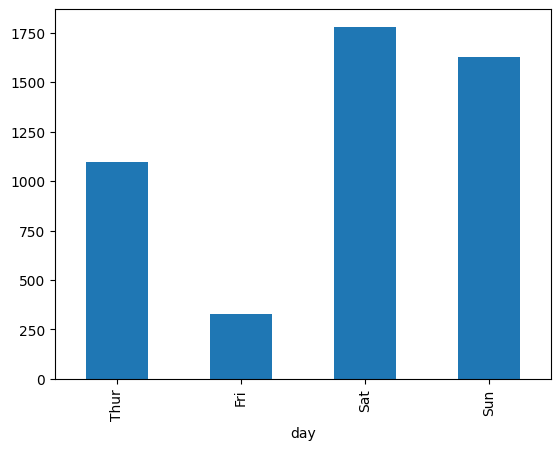

In [40]:
data.groupby('day').total_bill.sum().plot(kind = 'bar')
plt.show

Agrupandolo con 2 columnas

In [41]:
data.groupby(['day', 'sex']).tip.mean().unstack()
# groupby = agrupa por dia y sexo
# tip es propina y en este caso calcula el promedio

/tmp/ipython-input-1377816544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['day', 'sex']).tip.mean().unstack()


sex,Male,Female
day,,
Thur,2.980333,2.575625
Fri,2.693000,2.781111
Sat,3.083898,2.801786
Sun,3.220345,3.367222


Otra forma de agruparlo es la siguiente:

In [42]:
data.groupby(['day', 'sex'])['tip'].mean().unstack()
# Con .unstack(), conviertes uno de esos niveles de índice en columnas, dejando una tabla
#más “plana” o tipo pivot table.

/tmp/ipython-input-3792155132.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['day', 'sex'])['tip'].mean().unstack()


sex,Male,Female
day,,
Thur,2.980333,2.575625
Fri,2.693000,2.781111
Sat,3.083898,2.801786
Sun,3.220345,3.367222


## Ordenamiento

'''DataFrame.sort_values(

    by,              # columna(s) por las que quieres ordenar
  
    axis=0,          # 0 = filas (default), 1 = columnas
  
    ascending=True,  # True = menor a mayor, False = mayor a menor
  
    inplace=False    # Si quieres modificar el DataFrame original

)'''

In [52]:
data.sort_values('tip', ascending = False).head()

# sort_values sirve para ordenar un DataFrame (o una Serie) según los valores de una o varias columnas.

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192288
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
141,34.30,6.70,Male,No,Thur,Lunch,6,0.195335
